# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [336]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [338]:
#On importe les données dans un dataframe
df_historique = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [340]:
#On vérifie que le type des données attribué par pandas est cohérent
print(" les noms de colonnes sont : {} ".format(df_historique.columns.tolist()))
print("\nLe tableau comporte {} observation(s) ou article(s)".format(df_historique.shape[0]))
print("\nLe tableau comporte {} colonne(s)".format(df_historique.shape[1]))

 les noms de colonnes sont : ['date_mutation', 'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie', 'code_postal', 'nom_commune', 'code_type_local', 'type_local', 'surface_reelle'] 

Le tableau comporte 26196 observation(s) ou article(s)

Le tableau comporte 9 colonne(s)


In [341]:
display(df_historique.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [342]:
#display(df_historique.loc[df_historique['code_type_local'] ==4]['date_mutation'])

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [344]:
print("la liste des différents types de biens immobiliers que nous avons dans les données est : {}".format(df_historique['type_local'].unique()))
print("\nla liste des différents code-types de biens immobiliers que nous avons dans les données est : {}".format(df_historique['code_type_local'].unique()))

la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']

la liste des différents code-types de biens immobiliers que nous avons dans les données est : [2 4]


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4

### 3. Nombre de transactions

In [347]:
print('le nombre de transactions dans les données est {}'.format(df_historique.shape[0]))
print('le nombre de transactions pour les appartements dans les données est {}'.format(df_historique[df_historique['type_local'] == 'Appartement'].shape[0]))
print('le nombre de transactions pour les locaux commerciaux dans les données est {}'.format(df_historique[df_historique['type_local'] != 'Appartement'].shape[0]))

le nombre de transactions dans les données est 26196
le nombre de transactions pour les appartements dans les données est 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [349]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le {}'.format(df_historique['date_mutation'].min()))
print('la dernière date de transaction dans les données est le {}'.format(df_historique['date_mutation'].max()))

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [352]:
# Calcul de la colonne
df_historique['prix_m2'] = df_historique['valeur_fonciere'] / df_historique['surface_reelle']

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [355]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie']
# Suppression des colonnes inutiles
df_historique = df_historique.drop(columns=colonnes_a_supprimer)

In [356]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_appartements = df_historique[df_historique['type_local'] == 'Appartement']
display(df_appartements.head())

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

C:\Users\quent\AppData\Local\Temp\ipykernel_23388\342505552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appartements['date_mutation'] = pd.to_datetime(df_appartements['date_mutation'])
C:\Users\quent\AppData\Local\Temp\ipykernel_23388\342505552.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appartements['annee'] = df_appartements['date_mutation'].dt.year


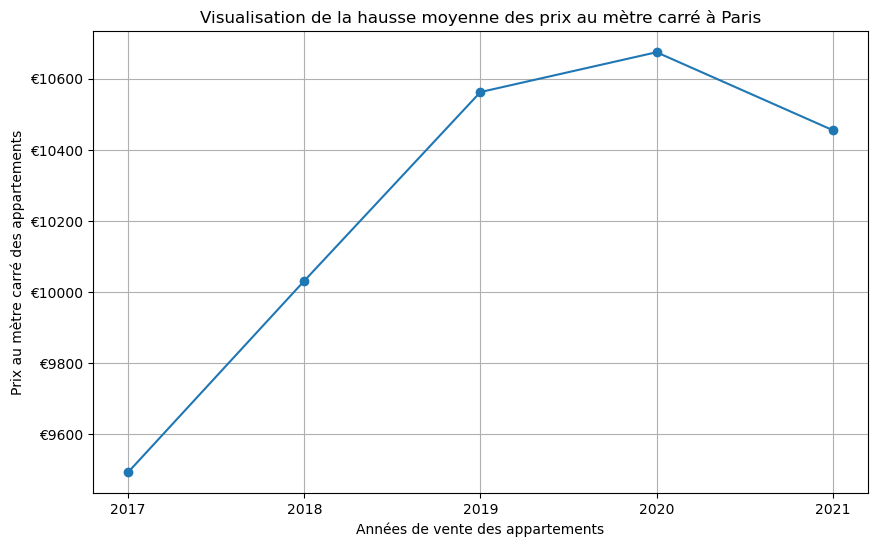

In [358]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assurez-vous que 'date_mutation' est au format datetime dans df_appartements
df_appartements['date_mutation'] = pd.to_datetime(df_appartements['date_mutation'])

# Extraire l'année à partir de 'date_mutation' dans df_appartements
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Calculer la moyenne des prix au mètre carré par année
moyenne_prix_par_annee_appartements = df_appartements.groupby('annee')['prix_m2'].mean()

#afficher les résulats de la manipulation

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(moyenne_prix_par_annee_appartements.index, moyenne_prix_par_annee_appartements.values, marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au mètre carré des appartements')

# Formatter les prix avec le symbole de l'euro
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid()
plt.title('Visualisation de la hausse moyenne des prix au mètre carré à Paris')
plt.xticks(moyenne_prix_par_annee_appartements.index.astype(int))
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [361]:
#Liste des codes postaux dans nos données.
print('les codes postaux sont :\n{}'.format(sorted(df_historique['code_postal'].unique())))

les codes postaux sont :
[75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [362]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
# prix_par_arrondissement = df_appartements.groupby(['date_mutation', 'code_postal'])['prix_m2'].mean().unstack()

prix_par_arrondissement = df_appartements[['annee','prix_m2','code_postal']].groupby([df_appartements.date_mutation.dt.year,'code_postal'],as_index=False).mean()
display(prix_par_arrondissement)

,code_postal,annee,prix_m2
0,75001,2017.0,11762.706289
1,75002,2017.0,10920.126562
2,75003,2017.0,11679.818729
3,75004,2017.0,12407.227522
4,75005,2017.0,11306.752404
5,75006,2017.0,12508.837036
6,75007,2017.0,11845.118831
7,75008,2017.0,10132.798372
8,75009,2017.0,9582.311203
9,75010,2017.0,8747.004273


In [363]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

prix_arrondissement_75001 = prix_par_arrondissement[prix_par_arrondissement['code_postal'] == 75001]
display(prix_arrondissement_75001)

,code_postal,annee,prix_m2
0,75001,2017.0,11762.706289
20,75001,2018.0,12621.226146
40,75001,2019.0,13269.256149
60,75001,2020.0,13405.991820
80,75001,2021.0,13379.498578


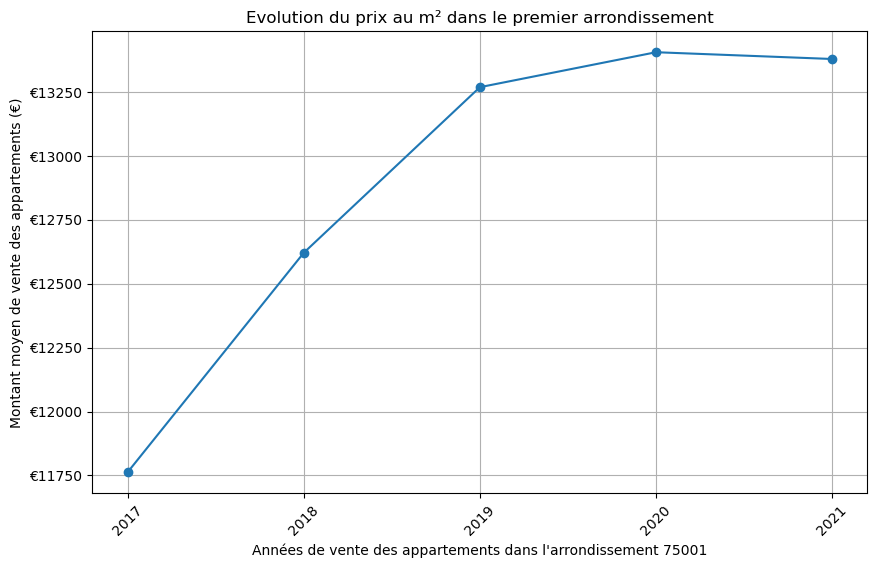

In [364]:


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Création d'un graphique pour visualiser la hausse de la moyenne des prix au mètre carré dans le 1er arrondissement
plt.figure(figsize=(10, 6))

# Tracer la courbe avec les données filtrées
plt.plot(prix_arrondissement_75001['annee'], prix_arrondissement_75001['prix_m2'], marker='o')

# Ajouter des labels et un titre
plt.xlabel('Années de vente des appartements dans l\'arrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements (€)')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')

# Rotation des étiquettes des années pour plus de lisibilité
plt.xticks(prix_arrondissement_75001['annee'].astype(int), rotation=45)

# Afficher le graphique
plt.show()


Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

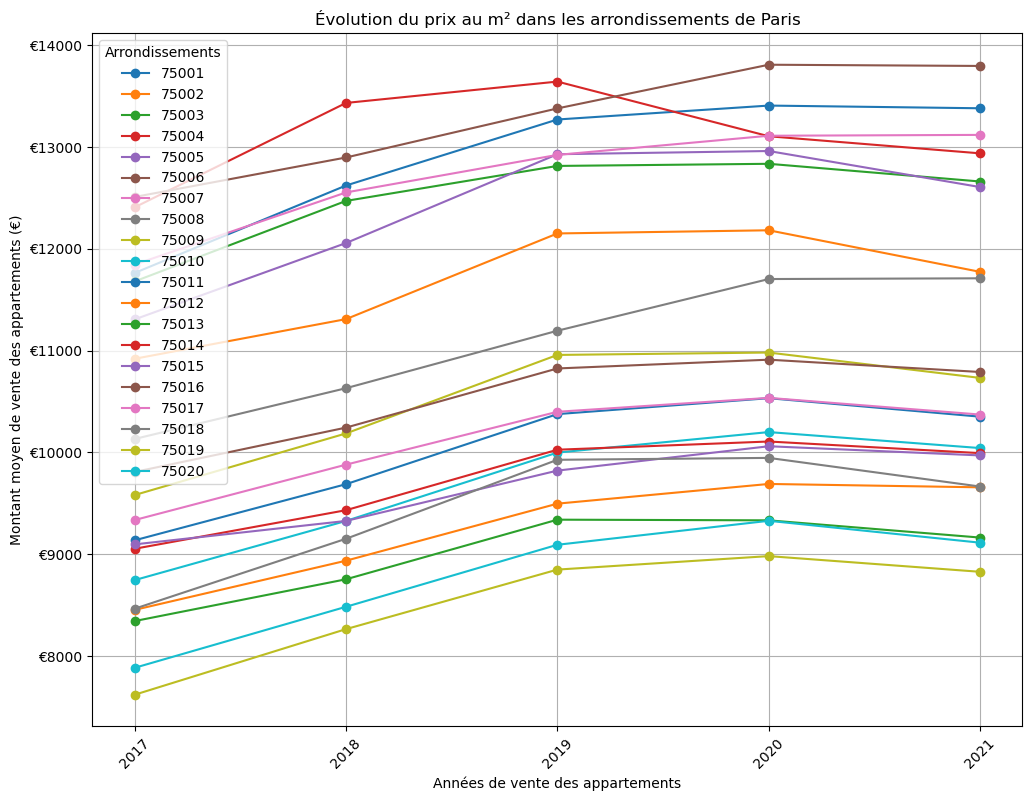

In [371]:
# Pivoter le DataFrame pour avoir les arrondissements en colonnes et les années en index
prix_par_arrondissement_pivot = prix_par_arrondissement.pivot(index='annee', columns='code_postal', values='prix_m2')

# Tracer l'évolution des prix pour chaque arrondissement
plt.figure(figsize=(12, 9))

for arrondissement in prix_par_arrondissement_pivot.columns:
    plt.plot(prix_par_arrondissement_pivot.index, prix_par_arrondissement_pivot[arrondissement], marker='o', label=arrondissement)

# Ajouter des labels et un titre
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements (€)')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution du prix au m² dans les arrondissements de Paris')
plt.legend(title='Arrondissements', loc='upper left')

# Rotation des étiquettes des années pour plus de lisibilité
plt.xticks(prix_par_arrondissement_pivot.index.astype(int), rotation=45)

# Afficher le graphique
plt.show()


On observe que globalement que :
Tous les prix ont augmenté de 2017 a 2020 puis ont légèrement chutés de 2020 à 2021, année qui correspond à la crise Covid-19.

### 7. Prix au metre carré par transaction dans un arrondissement

In [377]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

transactions_6eme = df_appartements[df_appartements['code_postal'] == 75006]

print(f"Nombre de transactions dans le 6ème arrondissement : {transactions_6eme.shape[0]}")

Nombre de transactions dans le 6ème arrondissement : 709


In [380]:
# Nombre total de transactions dans tous les arrondissements
total_transactions_count = df_appartements.shape[0]

# Moyenne des transactions par arrondissement
moyenne_transactions = total_transactions_count / 20

print("Nombre total de transactions : {}".format(total_transactions_count))
print("Moyenne du nombre de transactions par arrondissement : {}".format(moyenne_transactions))


Nombre total de transactions : 24353
Moyenne du nombre de transactions par arrondissement : 1217.65


On constate que le nombre de transactions dans le 6e arrondissement est moins élevé que la moyenne des transactions, le prix est donc plus élevé dans cet arrondissement.

Affichons l'historique des transactions pour visualiser la dispersion des données :

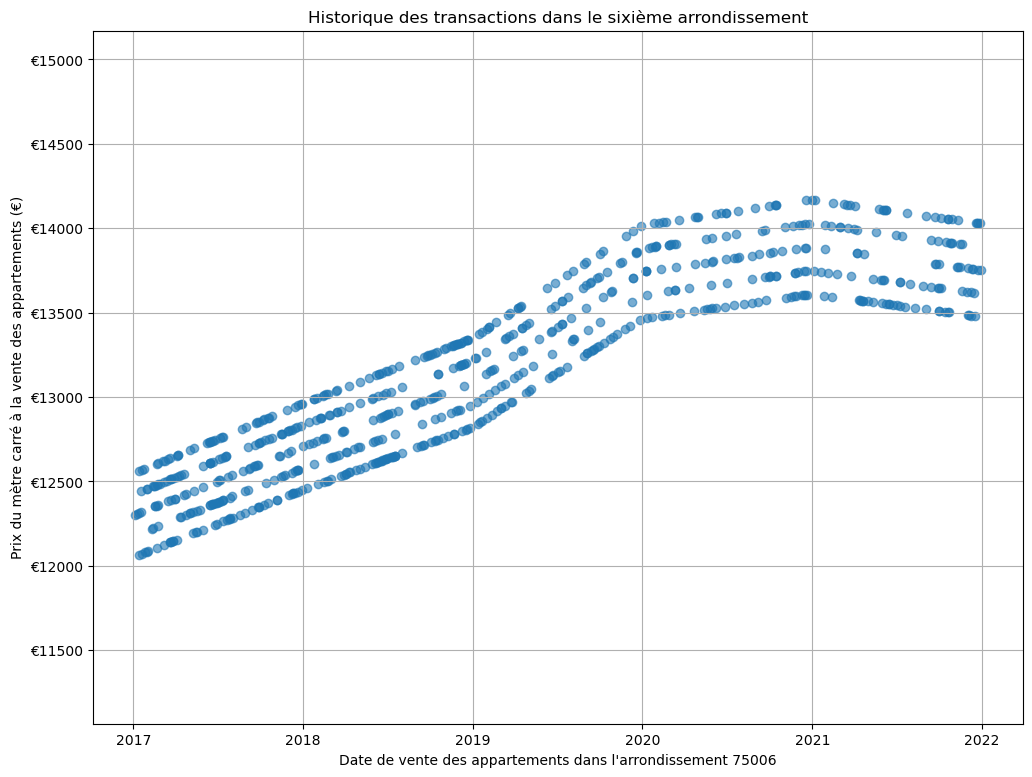

In [383]:
cp = 75006

# Filtrer les données pour l'arrondissement 75006
df_75006 = df_appartements[df_appartements['code_postal'] == cp]

# Créer le scatter plot
plt.figure(figsize=(12, 9))
plt.scatter(df_75006['date_mutation'], df_75006['prix_m2'], alpha=0.6)

# Configuration des axes et du graphique
plt.xlabel('Date de vente des appartements dans l\'arrondissement 75006')
plt.ylabel('Prix du mètre carré à la vente des appartements (€)')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajuster les limites de l'axe Y
plt.ylim(df_75006['prix_m2'].min() - 1000, df_75006['prix_m2'].max() + 1000)

plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()

On observe que ? 

Le prix au m2 dans le 6e arrondissement a continué de grimper en 2020 pour chuter en 2021

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [391]:
#On calcule la corrélation de Spearman
from scipy import stats
# Filtrer les données pour l'arrondissement 75006
df_75006 = df_appartements[df_appartements['code_postal'] == cp].copy()

# Utiliser .loc pour ajouter une nouvelle colonne avec les dates transformées en nombre de jours
df_75006.loc[:, 'date_mutation_numeric'] = (df_75006['date_mutation'] - df_75006['date_mutation'].min()).dt.days

# Calcul de la corrélation de Spearman entre la date et le prix au mètre carré
spearman_corr, p_value = stats.spearmanr(df_75006['date_mutation_numeric'], df_75006['prix_m2'])

# Affichage des résultats
print(f"Corrélation de Spearman: {spearman_corr:.3f}")
print(f"Valeur p: {p_value:.3f}")

Corrélation de Spearman: 0.915
Valeur p: 0.000


Le coefficient de corrélation est de 0.915 avec une pvalue de 00 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [394]:
# Filtrer les données pour les appartements ayant une surface et une valeur foncière non nulles
df_valid = df_appartements.dropna(subset=['valeur_fonciere', 'surface_reelle'])

# Calcul de la corrélation de Spearman
spearman_corr, spearman_p_value = stats.spearmanr(df_valid['valeur_fonciere'], df_valid['surface_reelle'])

# Affichage des résultats
print(f"Corrélation de Spearman: {spearman_corr:.3f}, Valeur p: {spearman_p_value:.3f}")


Corrélation de Spearman: 0.977, Valeur p: 0.000


Le coefficient de corrélation est de 0.977 avec une pvalue de 0.00 La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [401]:
# Filtrer les locaux commerciaux et faire une copie pour éviter l'avertissement SettingWithCopyWarning
df_locaux_commerciaux = df_historique[df_historique['type_local'] != 'Appartement'].copy()

# Forcer la conversion de 'date_mutation' en format datetime, en gérant les erreurs
df_locaux_commerciaux['date_mutation'] = pd.to_datetime(df_locaux_commerciaux['date_mutation'], errors='coerce')

# Extraire l'année à partir de 'date_mutation'
df_locaux_commerciaux['annee'] = df_locaux_commerciaux['date_mutation'].dt.year

# Calculer la moyenne des prix au mètre carré par année
moyenne_prix_par_annee_locaux = df_locaux_commerciaux.groupby('annee')['prix_m2'].mean()

# Afficher les premières lignes pour vérification
print(df_locaux_commerciaux.head())
print(moyenne_prix_par_annee_locaux.head())


    date_mutation  valeur_fonciere  code_postal               nom_commune  \
18     2017-02-01     3.113277e+06        75003   Paris 3e Arrondissement   
29     2017-02-17     1.164375e+06        75003   Paris 3e Arrondissement   
34     2017-02-20     3.802522e+05        75003   Paris 3e Arrondissement   
91     2017-03-09     3.623842e+05        75001  Paris 1er Arrondissement   
109    2017-03-29     3.159072e+05        75003   Paris 3e Arrondissement   

     code_type_local                                type_local  \
18                 4  Local industriel. commercial ou assimilé   
29                 4  Local industriel. commercial ou assimilé   
34                 4  Local industriel. commercial ou assimilé   
91                 4  Local industriel. commercial ou assimilé   
109                4  Local industriel. commercial ou assimilé   

     surface_reelle       prix_m2  annee  
18              250  12453.109192   2017  
29               95  12256.581685   2017  
34         

In [402]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
print(moyenne_prix_par_annee_locaux)
print(moyenne_prix_par_annee_appartements)

annee
2017    10949.909217
2018    11569.499180
2019    11960.132050
2020    11966.470204
2021    12006.488691
Name: prix_m2, dtype: float64
annee
2017     9492.859195
2018    10031.403432
2019    10562.712581
2020    10674.872650
2021    10455.600126
Name: prix_m2, dtype: float64


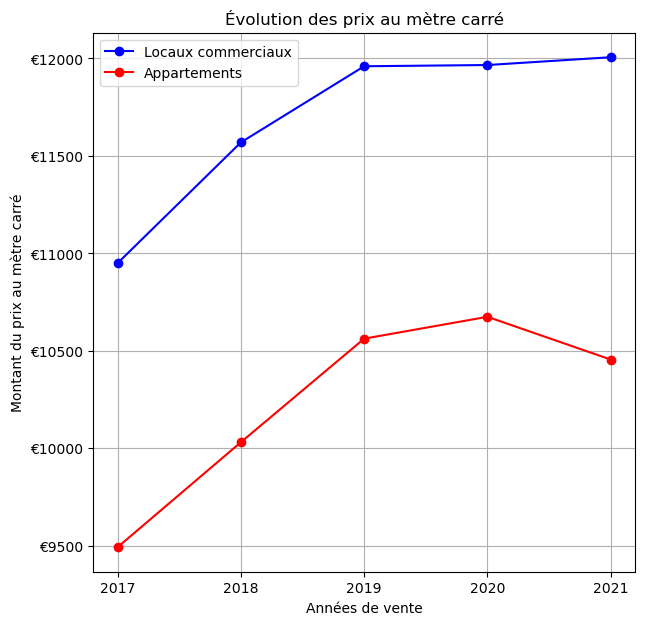

In [404]:
moyenne_prix_par_annee_locaux = moyenne_prix_par_annee_locaux.reset_index()
moyenne_prix_par_annee_appartements = moyenne_prix_par_annee_appartements.reset_index()


plt.figure(figsize=(7,7))
plt.plot(moyenne_prix_par_annee_locaux['annee'], moyenne_prix_par_annee_locaux['prix_m2'], marker='o', label='Locaux commerciaux', color='blue')
plt.plot(moyenne_prix_par_annee_appartements['annee'], moyenne_prix_par_annee_appartements['prix_m2'], marker='o', label='Appartements', color='red')

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution des prix au mètre carré')
plt.xticks(moyenne_prix_par_annee_appartements['annee'].astype(int))
plt.show()


Le prix au metre carré des locaux commerciaux est plus élevé que celui des appartements et son évolution continue d'augmenter pendant l'année 2020 contrairement au prix au metre carré des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [412]:
# Créer des colonnes one-hot encoded pour 'code_postal' et 'type_local'
df_encoded = pd.get_dummies(df_historique, columns=['code_postal', 'type_local'], drop_first=True)

# Afficher les premières lignes du DataFrame encodé
print(df_encoded.head())

  date_mutation  valeur_fonciere               nom_commune  code_type_local  \
0    2017-01-03     5.505597e+05   Paris 3e Arrondissement                2   
1    2017-01-12     1.576492e+06   Paris 8e Arrondissement                2   
2    2017-01-10     6.577574e+05   Paris 8e Arrondissement                2   
3    2017-01-10     2.500868e+05   Paris 3e Arrondissement                2   
4    2017-01-13     1.762667e+05  Paris 1er Arrondissement                2   

   surface_reelle       prix_m2  code_postal_75002  code_postal_75003  \
0              50  11011.193562                  0                  1   
1             163   9671.732877                  0                  0   
2              66   9966.020548                  0                  0   
3              22  11367.582877                  0                  1   
4              15  11751.113836                  0                  0   

   code_postal_75004  code_postal_75005  code_postal_75006  code_postal_75007  \
0    

In [413]:
from sklearn.preprocessing import OneHotEncoder

# Sélection des colonnes catégoriques à encoder
cols_to_encode = ['code_postal']

# Initialisation de l'encodeur
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encodage des colonnes catégoriques
encoded_data = encoder.fit_transform(df_historique[cols_to_encode])

# Transformation en DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

# Concaténation des colonnes encodées avec le DataFrame original (sans les colonnes d'origine)
df_encoded = pd.concat([df_historique.drop(columns=cols_to_encode), encoded_df], axis=1)

# Afficher les premières lignes du DataFrame encodé
print(df_encoded.head())


  date_mutation  valeur_fonciere               nom_commune  code_type_local  \
0    2017-01-03     5.505597e+05   Paris 3e Arrondissement                2   
1    2017-01-12     1.576492e+06   Paris 8e Arrondissement                2   
2    2017-01-10     6.577574e+05   Paris 8e Arrondissement                2   
3    2017-01-10     2.500868e+05   Paris 3e Arrondissement                2   
4    2017-01-13     1.762667e+05  Paris 1er Arrondissement                2   

    type_local  surface_reelle       prix_m2  code_postal_75002  \
0  Appartement              50  11011.193562                0.0   
1  Appartement             163   9671.732877                0.0   
2  Appartement              66   9966.020548                0.0   
3  Appartement              22  11367.582877                0.0   
4  Appartement              15  11751.113836                0.0   

   code_postal_75003  code_postal_75004  code_postal_75005  code_postal_75006  \
0                1.0                0.0  

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [418]:
#conversion des données en str

#Problème avec une date lors de la conversion
#ValueError: could not convert string to float: '2017-06-27'

# Extraire l'année, le mois, et le jour de la date
df_historique['annee'] = df_historique['date_mutation'].dt.year
df_historique['mois'] = df_historique['date_mutation'].dt.month
df_historique['jour'] = df_historique['date_mutation'].dt.day


In [419]:
from sklearn.model_selection import train_test_split

X = df_historique[['surface_reelle', 'annee', 'mois', 'jour', 'code_postal', 'code_type_local']] #features
y = df_historique['valeur_fonciere'] #target

# Diviser les données en ensembles d'entraînement et de test (33% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Vérification des formes des ensembles de données
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17551, 6) (8645, 6) (17551,) (8645,)


In [420]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Erreur Absolue Moyenne (MAE): {mae:.0f}")
print(f"Erreur Quadratique Moyenne (MSE): {mse:.0f}")
print(f"Erreur Quadratique Moyenne Racine (RMSE): {rmse:.0f}")
print(f"Pourcentage Erreur Absolue Moyenne (MAPE): {mape * 100:.2f}%")



Erreur Absolue Moyenne (MAE): 42336
Erreur Quadratique Moyenne (MSE): 7528928339
Erreur Quadratique Moyenne Racine (RMSE): 86769
Pourcentage Erreur Absolue Moyenne (MAPE): 10.72%


# Notre algorithme fait donc 42336 € d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :

- La MAE reste assez élevée
  
- Améliorer le feature engineering en ajoutant des caractéristiques (exemple : les appartements ont-ils un balcon / Les locaux ont-ils un parking ?) mais cela demande au client d'ajouter des données ou de fair eun long travail de recherche pour récupérer les données
  
- Combiner le modèle avec Random Forest ou XGBoost pour avoir une prédiction plus précise

In [424]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser les modèles
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner les modèles
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Définir des poids pour chaque modèle (par exemple, basé sur R^2 ou performance)
weight_linear = 0.7  # Poids pour la régression linéaire
weight_rf = 0.3      # Poids pour Random Forest

# Calculer la prédiction pondérée
y_pred_weighted = (weight_linear * y_pred_linear + weight_rf * y_pred_rf) / (weight_linear + weight_rf)

# Évaluer le modèle
mae = mean_absolute_error(y_test, y_pred_weighted)
mse = mean_squared_error(y_test, y_pred_weighted)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred_weighted)

print(f"Erreur Absolue Moyenne (MAE): {mae:.0f}")
print(f"Erreur Quadratique Moyenne (MSE): {mse:.0f}")
print(f"Erreur Quadratique Moyenne Racine (RMSE): {rmse:.0f}")
print(f"Pourcentage Erreur Absolue Moyenne (MAPE): {mape * 100:.2f}%")
#mettre en pourcentage

predictions_df = pd.DataFrame({'Valeur réelle': y_test, 'Valeur prédite': y_pred})
print(predictions_df.head())

Erreur Absolue Moyenne (MAE): 31703
Erreur Quadratique Moyenne (MSE): 6238737725
Erreur Quadratique Moyenne Racine (RMSE): 78986
Pourcentage Erreur Absolue Moyenne (MAPE): 7.70%
       Valeur réelle  Valeur prédite
7178   228793.952877   240064.165833
10733  213326.691507   216953.309680
20031  290498.700685   257013.875402
9698   704732.602740   775523.963801
18238  869560.789041   949142.531263


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [431]:
#On importe les données dans un dataframe
df_actifs = pd.read_excel("portefeuille_actifs.xlsx")
df_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [434]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
# Créer des colonnes one-hot encoded pour 'code_postal' et 'type_local'
df__actifs_encoded = pd.get_dummies(df_actifs, columns=['code_postal'], drop_first=True)

# Afficher les premières lignes du DataFrame encodé
print(df__actifs_encoded.head())

   adresse_numero            adresse_nom_voie  code_commune  \
0             127             RUE SAINT-DENIS         75101   
1              62  RUE NOTRE-DAME DE NAZARETH         75103   
2              62              RUE DE TURENNE         75103   
3              32                 AV GEORGE V         75108   
4             152                BD HAUSSMANN         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle_bati  nombre_pieces_principales  longitude   latitude  \
0                   25                          1   2.349593  48.863227   
1       

In [436]:
# Sélection des colonnes catégoriques à encoder
cols_to_encode = ['code_postal']

# Initialisation de l'encodeur
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encodage des colonnes catégoriques
actifs_encoded_data = encoder.fit_transform(df_actifs[cols_to_encode])

# Transformation en DataFrame
encoded_actifs_df = pd.DataFrame(actifs_encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

# Concaténation des colonnes encodées avec le DataFrame original (sans les colonnes d'origine)
df_actifs_encoded = pd.concat([df_actifs.drop(columns=cols_to_encode), encoded_df], axis=1)

# Afficher les premières lignes du DataFrame encodé
print(df_actifs_encoded.head())


   adresse_numero            adresse_nom_voie  code_commune  \
0           127.0             RUE SAINT-DENIS       75101.0   
1            62.0  RUE NOTRE-DAME DE NAZARETH       75103.0   
2            62.0              RUE DE TURENNE       75103.0   
3            32.0                 AV GEORGE V       75108.0   
4           152.0                BD HAUSSMANN       75108.0   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41              2.0  Appartement   
1   Paris 3e Arrondissement           20.47              2.0  Appartement   
2   Paris 3e Arrondissement           64.48              2.0  Appartement   
3   Paris 8e Arrondissement           63.29              2.0  Appartement   
4   Paris 8e Arrondissement           20.58              2.0  Appartement   

   surface_reelle_bati  nombre_pieces_principales  longitude   latitude  \
0                 25.0                        1.0   2.349593  48.863227   
1       

In [438]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

df_actifs['date'] = dt.datetime(2022, 12, 31)

df_actifs['annee'] = df_actifs['date'].dt.year
df_actifs['mois'] = df_actifs['date'].dt.month
df_actifs['jour'] = df_actifs['date'].dt.day

df_actifs.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

df_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,date,annee,mois,jour
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,2022-12-31,2022,12,31
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,2022-12-31,2022,12,31
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,2022-12-31,2022,12,31
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,2022-12-31,2022,12,31
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,2022-12-31,2022,12,31


In [440]:
#Conversion du dataframe en str


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [443]:
X_new = df_actifs[['surface_reelle', 'annee', 'mois', 'jour', 'code_postal', 'code_type_local']] #features

# Faire des prédictions
actifs_pred_linear = linear_model.predict(X_new)
actifs_pred_rf = rf_model.predict(X_new)

# Définir des poids pour chaque modèle (par exemple, basé sur R^2 ou performance)
weight_linear = 0.8  # Poids pour la régression linéaire
weight_rf = 0.2      # Poids pour Random Forest

# Calculer la prédiction pondérée
actifs_pred_weighted = (weight_linear * actifs_pred_linear + weight_rf * actifs_pred_rf) / (weight_linear + weight_rf)

# Sauvegarder les résultats
df_results = pd.DataFrame(actifs_pred_weighted, columns=['Prédictions'])
df_results.to_csv('predictions.csv', index=False)

print("Prédictions réalisées avec succès et sauvegardées.")

#On vérifie les 10 premières valeurs
df_results.head(10)

Prédictions réalisées avec succès et sauvegardées.


,Prédictions
0,390468.084188
1,339045.138870
2,817946.309023
3,859688.210248
4,294713.406889
5,439634.926364
6,360930.164288
7,678368.591241
8,108571.823848
9,120864.518233


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [446]:
df_actifs['Predictions'] = actifs_pred_weighted

In [448]:
#Valorisation du portefeuille sur le segment des particuliers
valorisation_totale_particulier = df_actifs.loc[df_actifs['type_local'] == 'Appartement', 'Predictions'].sum()

# Convertir en millions d'euros
valorisation_totale_particulier_millions = valorisation_totale_particulier / 1_000_000

# Afficher le résultat
print('La valorisation du segment particulier est (en millions d\'euros) :', valorisation_totale_particulier_millions)


La valorisation du segment particulier est (en millions d'euros) : 70.0561745617238


In [450]:
#Valorisation du portefeuille sur le segment corporate
valorisation_totale_corporate = df_actifs.loc[df_actifs['type_local'] != 'Appartement', 'Predictions'].sum()

# Convertir en millions d'euros
valorisation_totale_corporate_millions = valorisation_totale_corporate / 1_000_000

# Afficher le résultat
print('La valorisation du segment corporate est (en millions d\'euros) :', valorisation_totale_corporate_millions)

La valorisation du segment corporate est (en millions d'euros) : 96.4054313046389


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :

- Clairement le segment corporate a la plus grande valorisation avec 96.4 millions contre 70.1 millions pour le segment particuliers
  
- Bien entendu cela ne représente la valorisation exacte des actifs de la société car il y a une erreur moyenne de 31703 € sur les actifs

- De plus certaines options ne sont pas prises en compte dans la prédiction comme le nombre de pièce des appartements par exemple


# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [455]:
#On importe les données dans un dataframe
df_classement = pd.read_excel("echantillon_a_classer2.xlsx")

df_classement.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [458]:
df_classement['Prix_m2'] = df_classement['valeur_fonciere'] / df_classement['surface_reelle']

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [461]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Application de K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
X = df_classement[['Prix_m2']]  # Sélectionne la colonne des prix au m2 pour l'entraînement
df_classement['Code_type_de_bien'] = kmeans.fit_predict(X)

# Les centres des clusters
centers = kmeans.cluster_centers_


# Affichage des résultats
print(df_classement)
print(f'Centres des clusters: {centers}')


C:\Users\quent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    valeur_fonciere  code_postal               nom_commune  surface_reelle  \
0     868687.083271        75019  Paris 19e Arrondissement              88   
1     452050.762192        75019  Paris 19e Arrondissement              45   
2     193088.653587        75019  Paris 19e Arrondissement              21   
3     303012.549370        75019  Paris 19e Arrondissement              32   
4     149272.200110        75019  Paris 19e Arrondissement              20   
5     179676.304545        75019  Paris 19e Arrondissement              18   
6     241856.569418        75019  Paris 19e Arrondissement              25   
7     462981.797149        75019  Paris 19e Arrondissement              63   
8     518819.726233        75019  Paris 19e Arrondissement              53   
9     403670.310822        75019  Paris 19e Arrondissement              53   
10    374523.452055        75019  Paris 19e Arrondissement              50   
11    371204.968028        75019  Paris 19e Arrondissement      

In [462]:
# On vérifie les données de la prédiction
from sklearn.metrics import silhouette_score

# Vérification des données de la prédiction
kmeans_labels = kmeans.predict(X)

# Calcul du score de silhouette
print("Silhouette score:", round(silhouette_score(X, kmeans_labels), 2))

Silhouette score: 0.91


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

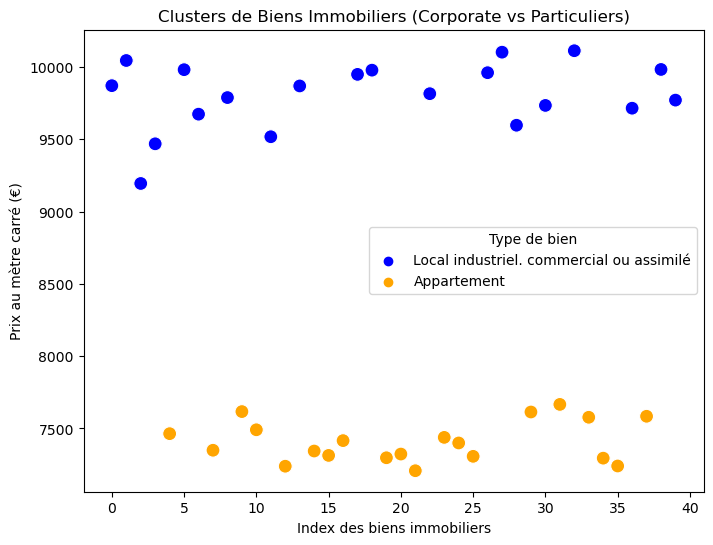

In [466]:
#On affiche les résultats

import matplotlib.pyplot as plt
import seaborn as sns

# Créer une colonne pour le nom des clusters pour l'affichage
df_classement['Type_de_bien'] = df_classement['Code_type_de_bien'].apply(lambda x: 'Local industriel. commercial ou assimilé' if x == 1 else 'Appartement')

# Tracer les clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_classement.index, y='Prix_m2', hue='Type_de_bien', data=df_classement, palette=['blue', 'orange'], s=100)

# Ajouter un titre et des labels
plt.title('Clusters de Biens Immobiliers (Corporate vs Particuliers)')
plt.xlabel('Index des biens immobiliers')
plt.ylabel('Prix au mètre carré (€)')
plt.legend(title='Type de bien')

# Afficher le graphique
plt.show()


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- ?
- ?

In [470]:
# Application de K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 10)
X_new = df_historique[['prix_m2', 'code_postal']] 
df_historique['Code_type_de_bien'] = kmeans.fit_predict(X_new)

# Les centres des clusters
centers = kmeans.cluster_centers_


# Affichage des résultats
print(f'Centres des clusters: {centers}')

Centres des clusters: [[ 9680.32198837 75014.82096909]
 [12542.73616795 75005.49009985]]


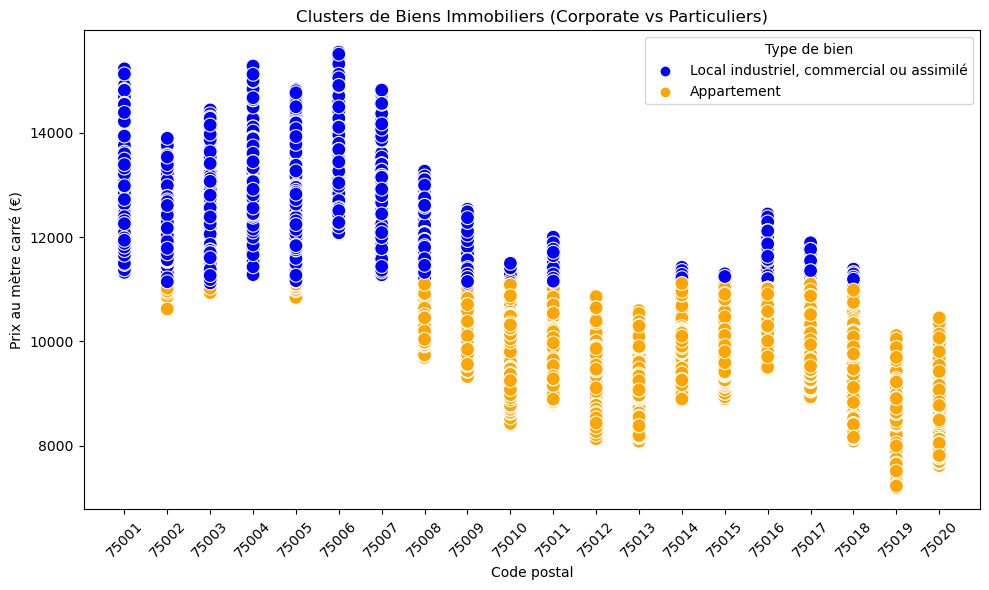

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_historique['Type_de_bien'] = df_historique['Code_type_de_bien'].apply(lambda x: 'Local industriel, commercial ou assimilé' if x == 1 else 'Appartement')


df_historique_sorted = df_historique.sort_values(by='code_postal')


plt.figure(figsize=(10, 6))

# Tracer les clusters avec les données triées
sns.scatterplot(x='code_postal', y='prix_m2', hue='Type_de_bien', data=df_historique_sorted, palette=['blue', 'orange'], s=100)

# Titre et labels
plt.title('Clusters de Biens Immobiliers (Corporate vs Particuliers)')
plt.xlabel('Code postal')
plt.ylabel('Prix au mètre carré (€)')
plt.legend(title='Type de bien')

# Définir les ticks de l'axe des x (échelle de 1 en 1)
code_postal_min = df_historique_sorted['code_postal'].min()
code_postal_max = df_historique_sorted['code_postal'].max()
plt.xticks(np.arange(code_postal_min, code_postal_max + 1, step=1), rotation=45)


plt.tight_layout()
plt.show()


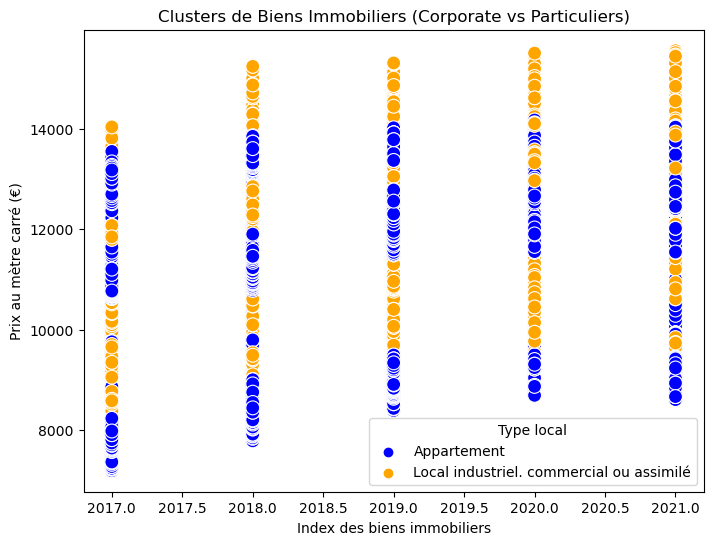

In [472]:
# Tracer les clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_historique.annee, y='prix_m2', hue='type_local', data=df_historique, palette=['blue', 'orange'], s=100)

# Titre et labels
plt.title('Clusters de Biens Immobiliers (Corporate vs Particuliers)')
plt.xlabel('Index des biens immobiliers')

plt.ylabel('Prix au mètre carré (€)')
plt.legend(title='Type local')
#plt.xticks(df_historique['annee'].astype(int))

plt.show()